# Name : KUMARA B.W.J.C.
# Index No: 190328V

In [22]:
%matplotlib inline

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 


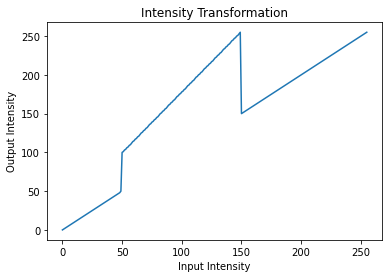

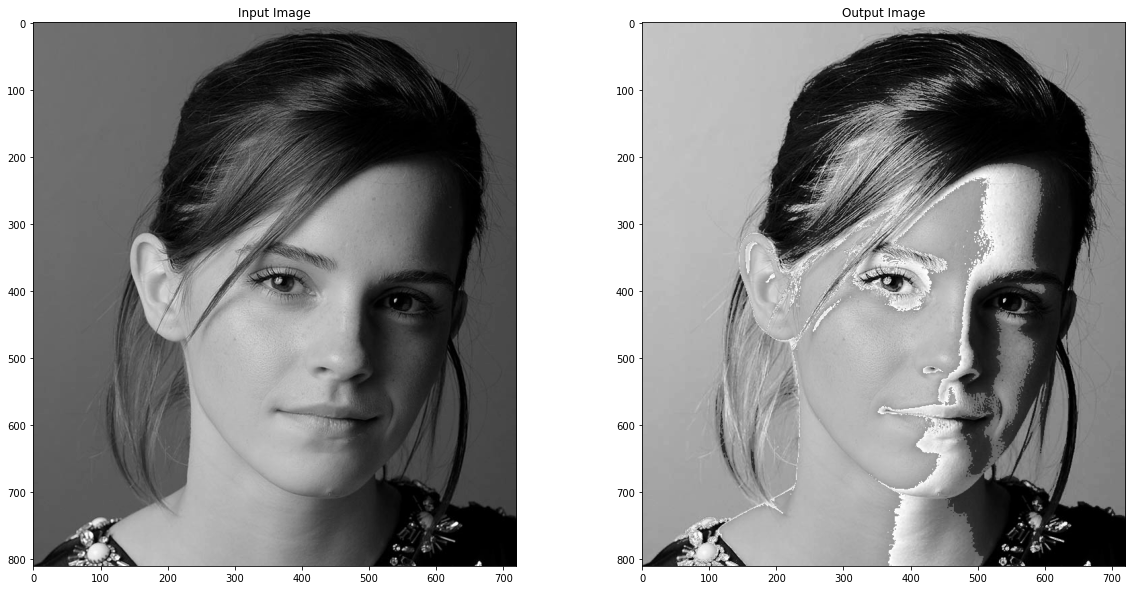

In [23]:
# Q01

img = cv.imread(r'./Images/emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert img is not None

# Creating the Intensity transformation array
t1 = np.linspace(0,50,50)
t2 = np.linspace(50,100,0)
t3 = np.linspace(100,255,100)
t4 = np.linspace(255,150,0)
t5 = np.linspace(150,255,106)
t = np.concatenate((t1,t2,t3,t4,t5),axis =0).astype(np.uint8)

fig, ax = plt.subplots(facecolor = 'white')
ax.plot(t)
ax.set_title('Intensity Transformation')
ax.set_ylabel('Output Intensity')
ax.set_xlabel('Input Intensity')
plt.show()

assert len(t) == 256

fig_o, ax_o = plt.subplots(1,2,figsize = (20,10),facecolor = 'white')

t_img = cv.LUT(img,t)

ax_o[0].imshow(img,cmap = 'gray',vmin = 0, vmax =255)
ax_o[0].set_title('Input Image')
ax_o[1].imshow(t_img,cmap = 'gray',vmin = 0, vmax =255)
ax_o[1].set_title('Output Image')


plt.show()

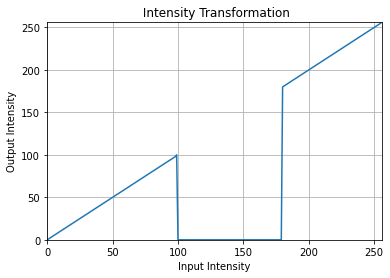

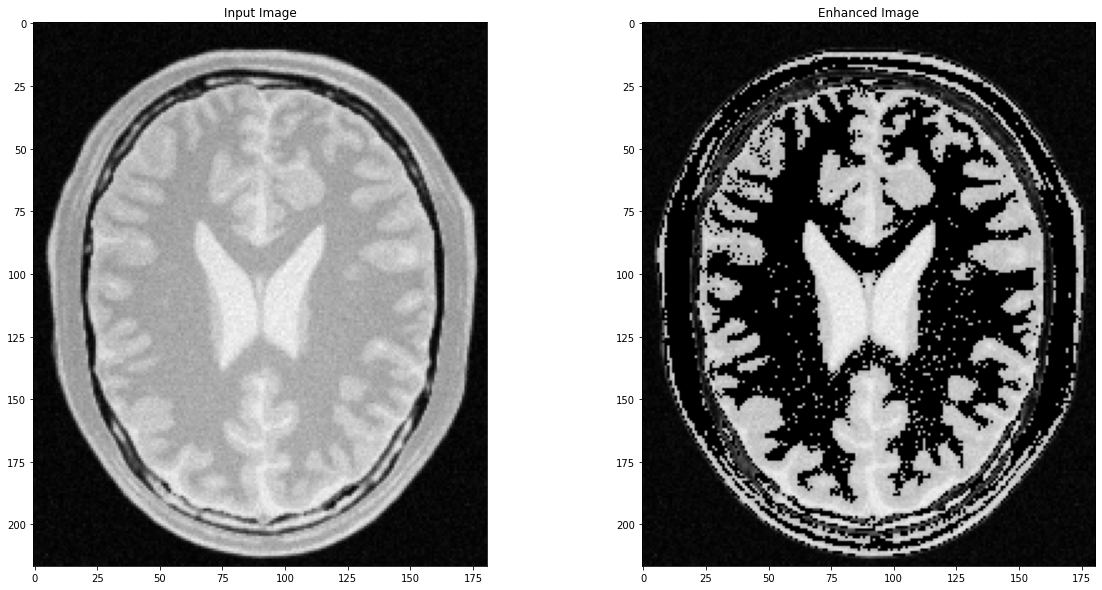

In [24]:
# Q02

img = cv.imread(r'./Images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0,100,100)
t2 = np.linspace(100,0,0)
t3 = np.linspace(0,0,80)
t4 = np.linspace(0,180,0)
t5 = np.linspace(180,255,76)
t = np.concatenate((t1,t2,t3,t4,t5),axis =0).astype(np.uint8)

fig, ax = plt.subplots(facecolor = 'white')
ax.plot(t)
ax.set_title(' Intensity Transformation')
ax.set_ylabel('Output Intensity')
ax.set_xlabel('Input Intensity')
ax.grid('on')
plt.xlim([0,256])
plt.ylim([0,256])
plt.show()

assert len(t) == 256

fig_o, ax_o = plt.subplots(1,2,figsize = (20,10),facecolor = 'white')

t_img = cv.LUT(img,t)

ax_o[0].imshow(img,cmap = 'gray',vmin = 0, vmax =255)
ax_o[0].set_title('Input Image')
ax_o[1].imshow(t_img,cmap = 'gray',vmin = 0, vmax =255)
ax_o[1].set_title('Enhanced Image')


plt.show()

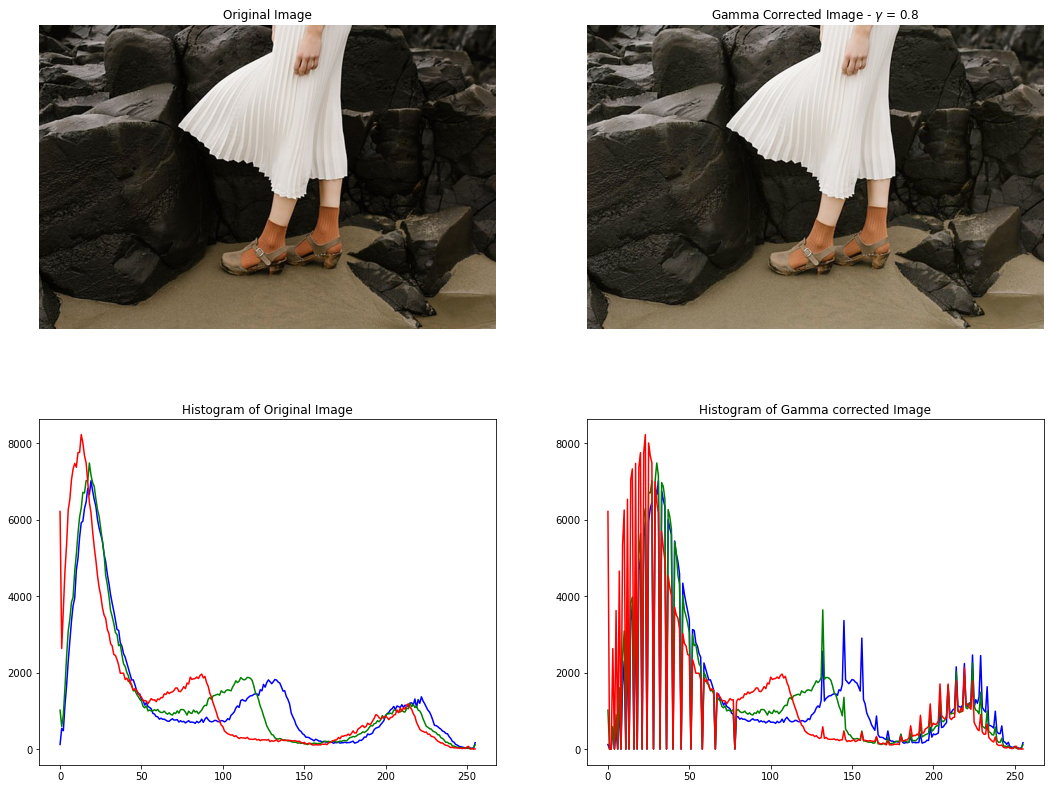

In [25]:
# Q03


gamma =0.8 # Selece Gamma Value

img_orig = cv.imread(r'./Images/highlights_and_shadows.jpg')

table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(img_orig,table)

img_orig = cv.cvtColor(img_orig,cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(img_gamma,cv.COLOR_BGR2RGB)

fig , ax = plt.subplots(2,2,figsize = (18,14),facecolor ='white')

ax[0,0].imshow(img_orig)
ax[0,0].set_title("Original Image")
ax[0,0].axis('off')
ax[0,1].imshow(img_gamma)
ax[0,1].set_title("Gamma Corrected Image - $\gamma$ = {}".format(gamma))
ax[0,1].axis('off')

color = ('b','g','r')


for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig],[i],None,[256],[0,256])
    ax[1,0].plot(hist_orig, color = c)
    hist_gamma = cv.calcHist([img_gamma],[i],None,[256],[0,256])
    ax[1,1].plot(hist_gamma, color = c)

ax[1,0].set_title("Histogram of Original Image")
ax[1,1].set_title("Histogram of Gamma corrected Image")
plt.show()

# Question 04

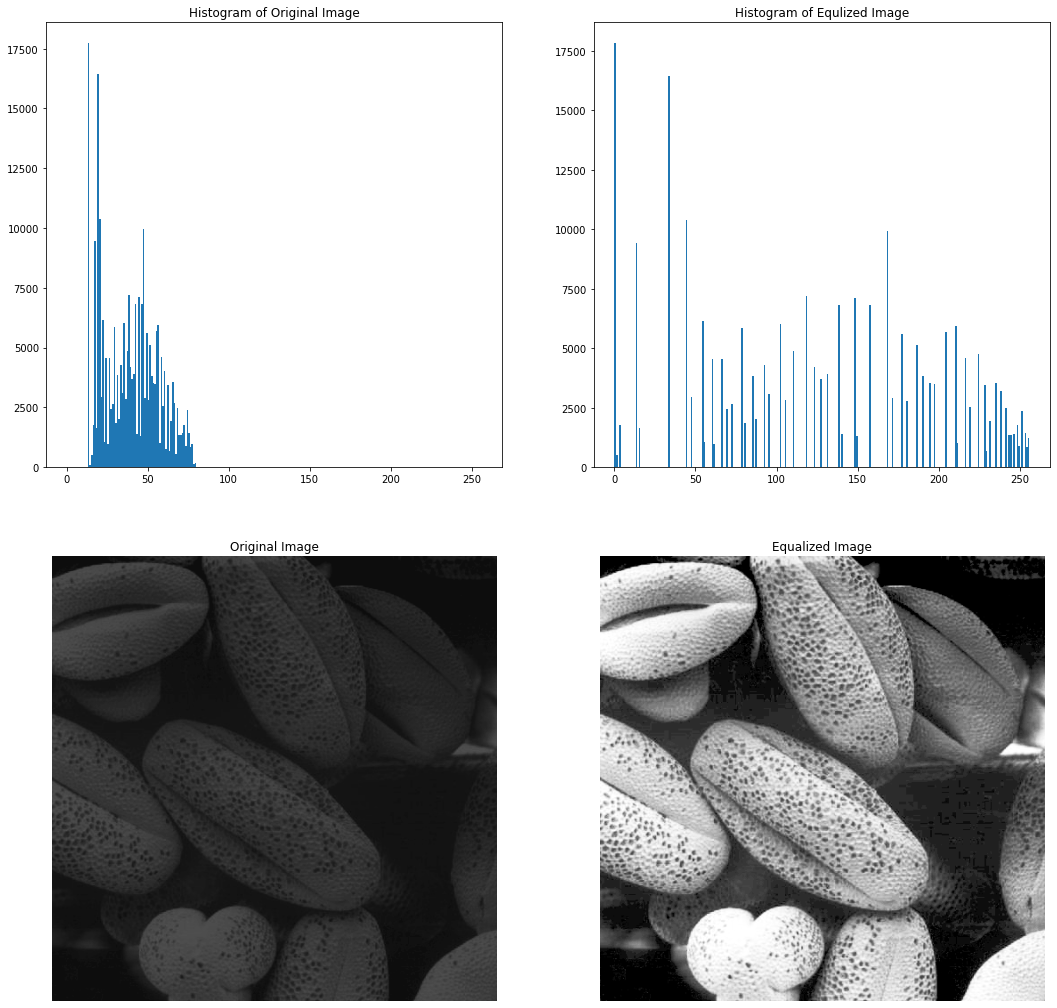

In [26]:
# Q04

img = cv.imread(r'./Images/shells.png',cv.IMREAD_GRAYSCALE)
assert img is not None
fig , ax = plt.subplots(2,2,figsize = (18,18),facecolor ='white')
equ = cv.equalizeHist(img)

ax[0,0].hist(img.flatten(), 256,[0,256])
ax[0,0].set_title('Histogram of Original Image')

ax[0,1].hist(equ.flatten(), 256,[0,256])
ax[0,1].set_title('Histogram of Equlized Image')

ax[1,0].imshow(img,cmap = 'gray',vmin = 0, vmax =255)
ax[1,0].set_title("Original Image")
ax[1,0].axis('off')
ax[1,1].imshow(equ,cmap = 'gray',vmin = 0, vmax =255)
ax[1,1].set_title("Equalized Image")
ax[1,1].axis('off')
plt.show()


# Question 05

* ## Nearest neighbour Zooming

In [27]:


img = cv.imread(r'./Images/a1q5images/im02small.png',cv.IMREAD_GRAYSCALE)
assert img is not None
#Image Zooming

S = 2

Rows = int(S*img.shape[0])
Coloumns = int(S*img.shape[1])
print(Rows,Coloumns)
img_zoom = np.zeros((Rows,Coloumns),dtype=img.dtype)

for r in range(0,Rows):
    for c in range(0,Coloumns):
        img_zoom[r,c] = img[int(r/S),int(c/S)]


cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',img)
cv.waitKey(0)
cv.namedWindow('Zoomed Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Zoomed Image',img_zoom)
cv.waitKey(0)
cv.destroyAllWindows()

600 960


* ## Bilinear Interpolation

In [29]:
mg = cv.imread(r'./Images/a1q5images/im02small.png',cv.IMREAD_GRAYSCALE)
assert img is not None
#Image Zooming

S = 2

org_R =img.shape[0]
org_C = img.shape[1]
Rows = int(S*org_R)
Coloumns = int(S*org_C)
print(Rows,Coloumns)
img_zoom = np.zeros((Rows,Coloumns),dtype=img.dtype)

for r in range(0,Rows):
    for c in range(0,Coloumns):
        R = r/S
        C = c/S
        i_R = int(R)
        i_C = int(C)
        d_R = R-i_R
        d_C = C-i_C
        if i_R==org_R-1 or i_C==org_C-1:
            img_zoom[r,c] = img[i_R,i_C]
            continue
        P1 = img[i_R,i_C]*(1-d_R)+img[i_R+1,i_C]*(d_R)
        P2 = img[i_R,i_C+1]*(1-d_R)+img[i_R+1,i_C+1]*(d_R)
        Pix_val = P1*(1-d_C)+P2*d_C

        img_zoom[r,c] = Pix_val


cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',img)
cv.waitKey(0)
cv.namedWindow('Zoomed Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Zoomed Image',img_zoom)
cv.waitKey(0)
cv.destroyAllWindows()

600 960


# Question 06

## a)


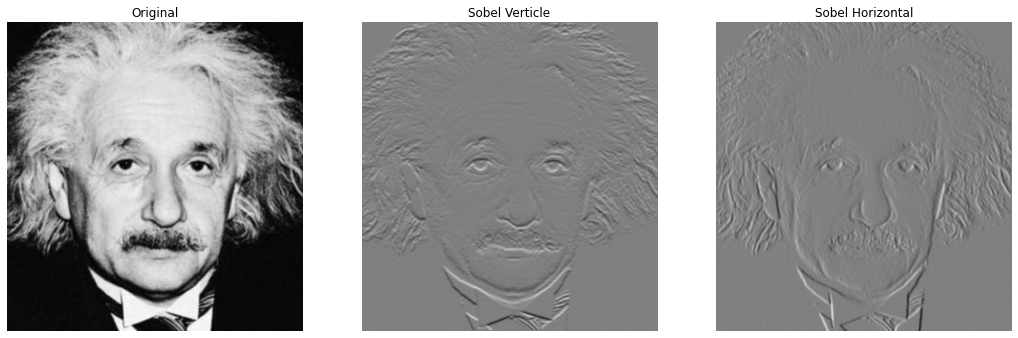

In [35]:
img = cv.imread(r'./Images/einstein.png',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype= np.float32)
im_x = cv.filter2D(img,-1,sobel_v)

sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype= np.float32)
im_y = cv.filter2D(img,-1,sobel_h)


fig , ax  = plt.subplots(1,3,figsize=(18,6),facecolor = 'white')
ax[0].imshow(img,cmap = 'gray',vmin = 0, vmax =255)
ax[0].set_title('Original')
ax[1].imshow(im_x,cmap = 'gray',vmin = -1020, vmax =1020)
ax[1].set_title('Sobel Verticle')
ax[2].imshow(im_y,cmap = 'gray',vmin = -1020, vmax =1020)
ax[2].set_title('Sobel Horizontal')
for i in range(3):
    ax[i].axis('off')
plt.show()

## b)

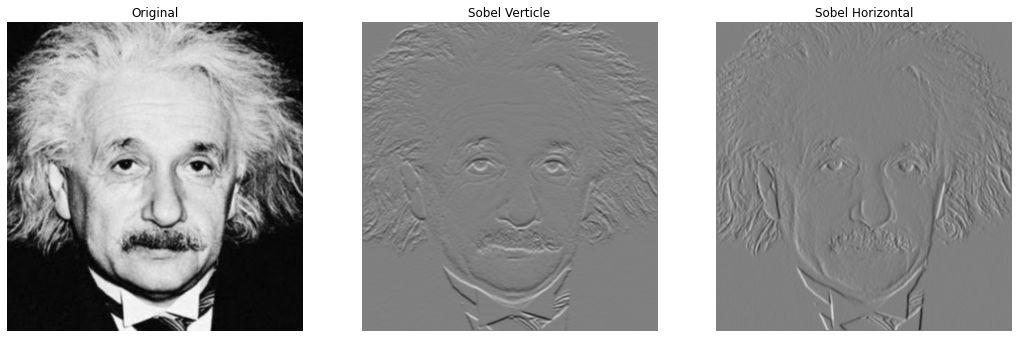

In [39]:
def filter2D(image, kernel):
    assert kernel.shape[0] % 2 and kernel.shape[1] % 2
    h_offset = kernel.shape[0]//2
    w_offset = kernel.shape[1]//2
    h, w = image.shape
    result = np.zeros(image.shape, dtype = np.float32)

    for r in range(h_offset, h-h_offset):
        for c in range(w_offset, w-w_offset):
            result[r][c] = np.dot(image[r-h_offset:r+h_offset+1, c-w_offset:c+w_offset+1].flatten(), kernel.flatten())
    
    return result


img = cv.imread(r'./Images/einstein.png',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype= np.float32)
im_x = filter2D(img,sobel_v)

sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype= np.float32)
im_y = filter2D(img,sobel_h)


fig , ax  = plt.subplots(1,3,figsize=(18,6),facecolor = 'white')
ax[0].imshow(img,cmap = 'gray',vmin = 0, vmax =255)
ax[0].set_title('Original')
ax[1].imshow(im_x,cmap = 'gray',vmin = -1020, vmax =1020)
ax[1].set_title('Sobel Verticle')
ax[2].imshow(im_y,cmap = 'gray',vmin = -1020, vmax =1020)
ax[2].set_title('Sobel Horizontal')

for i in range(3):
    ax[i].axis('off')

plt.show()

## c)

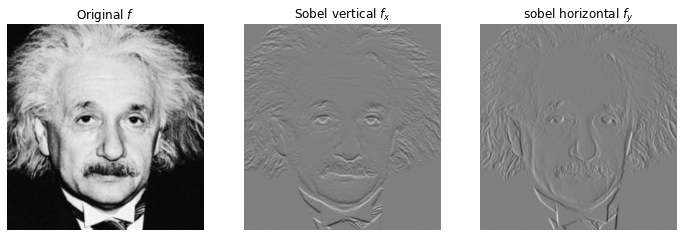

In [43]:
im = cv.imread('Images/einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert im is not None

k1_v = np.array([[-1],[0],[1]], dtype = np.float32)
im_intermediate_v = filter2D(im, k1_v)
k2_v = np.array([[1, 2, 1]] , dtype = np.float32)
im_sobelv = filter2D(im_intermediate_v, k2_v)

k1_h = np.array([[1], [2], [1]], dtype = np.float32)
im_intermediate_h = filter2D(im, k1_h)
k2_h = np.array([[-1, 0, 1]] , dtype = np.float32)
im_sobelh = filter2D(im_intermediate_h, k2_h)

fig, ax = plt.subplots(1,3, figsize=(12,6),facecolor = 'white')

ax[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original')
ax[1].imshow(im_sobelv, cmap = 'gray', vmin = -1020, vmax = 1020)
ax[1].set_title('Sobel vertical')

ax[2].imshow(im_sobelh, cmap = 'gray', vmin = -1020, vmax = 1020)
ax[2].set_title('sobel horizontal')

for i in range(3):
    ax[i].axis('off')

plt.show()

# Question 07

[]

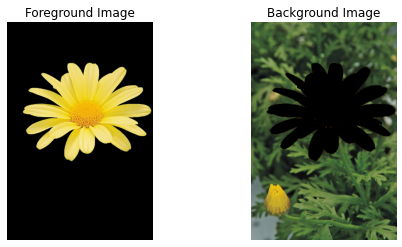

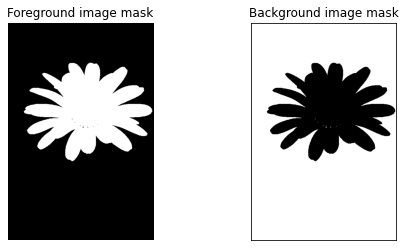

In [51]:

img = cv.imread('images/daisy.jpg', cv.IMREAD_COLOR)
assert img is not None

mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (60, 150, 500, 400)
cv.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

#foreground 
mask_foreground = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_foreground = img * mask2[:, :, np.newaxis]

#backgroung 
mask_background = np.where((mask==1)|(mask==3),0,1).astype('uint8')
img_background = img * mask3[:, :, np.newaxis]

fig, ax = plt.subplots(1, 2, figsize=(8,4),facecolor ='white')

img_f_rgb = cv.cvtColor(img_foreground, cv.COLOR_BGR2RGB)
ax[0].imshow(img_f_rgb)
ax[0].set_title("Foreground Image")
ax[0].axis('off')

img_b_rgb = cv.cvtColor(img_background,cv.COLOR_BGR2RGB)
ax[1].imshow(img_b_rgb)
ax[1].set_title("Background Image")
ax[1].axis('off')

fig,ax = plt.subplots(1,2,figsize=(8,4),facecolor ='white')

ax[0].set_title("Foreground image mask")
ax[0].imshow(mask_foreground, cmap='gray')
ax[0].axis('off')

ax[1].set_title("Background image mask")
ax[1].imshow(mask_background, cmap='gray')
ax[1].set_xticks([]); ax[1].set_yticks([])

plt.plot()

## b)

[]

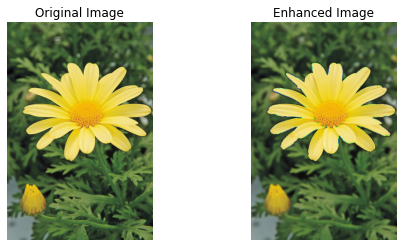

In [53]:
img = cv.imread('images/daisy.jpg', cv.IMREAD_COLOR)
assert img is not None

k = 9
sigma = 3
blured_img = cv.GaussianBlur(img_background, (k, k), sigma)
enhanced_img = img_foreground + blured_img

fig, ax = plt.subplots(1,2,figsize=(8,4),facecolor = 'white')

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
ax[0].imshow(img)
ax[0].set_title("Original Image")

enhanced_img = cv.cvtColor(enhanced_img, cv.COLOR_BGR2RGB)
ax[1].imshow(enhanced_img)
ax[1].set_title("Enhanced Image")
for i in range(2):
    ax[i].axis('off')

plt.plot()